# FIR (Finite Impulse Response) Filters

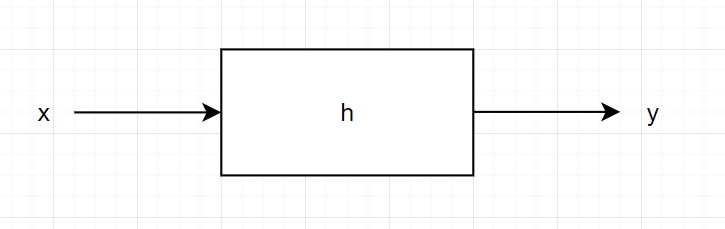

## Background reading
Proakis and Manolakis Section 10.2.1

## Convolution - Time Domain
$$
\begin{align}
y(n)& = h(0)x(n) + h(1)x(n-1) + \ldots + h(M-1)x(n-M+1) &\\
& = \sum_{k=0}^{M-1} h(k) x(n-k)&\\
\end{align}
$$

## DTFT - Frequency Domain
$$
  H(\omega) = \sum_{n=-\infty}^\infty h(n) e^{-j \omega n}
$$
$$
  Y(\omega) = H(\omega) X(\omega)
$$
Simple multiplication!

## Symmetry / Types of FIR filters
### Non-linear phase
No particular symmetry

### Linear phase type I - odd length, symmetric
$$
h(n) = h(M-n), 0 \le n \le M
$$
$M$ is odd.
### Linear phase type II - even length, symmetric
$$
h(n) = h(M-n), 0 \le n \le M
$$
$M$ is even.


### Linear phase type III  - even length, antisymmetric
$$
h(n) = -h(M-n), 0 \le n \le M
$$
$M$ is even.

### Linear phase type IV - odd length, antisymmetric
$$
h(n) = -h(M-n), 0 \le n \le M
$$
$M$ is odd.


## Exercise 1.
The DTFT at $\omega=0$, $H(0)$, is given by $\sum_{n=0}^{M-1} h(n)$.

The DTFT at $\omega=\pi$, $H(\pi)$, is given by $\sum_{n=0}^{M-1} h(n) (-1)^n$.

For each type of linear phase filter, answer the following:

a. If the DTFT $H(0)$ is 0, this is not a good LPF (low pass filter). Is this a good LPF?

b. If the DTFT $H(\pi)$ is 0, this is not a good HPF (high pass filter). Is this a good HPF?

## Exercise 2.
For each of the following filters, determine its symmetry type (non-linear phase, linear phase type I, linear phase type II, linear phase type III, or linear phase type IV)

1,-1,2,1,-1

1,-1,0,1,-1

1,2,2,1

1,2,3,2,1

1,2,3

-1,1,-1,1

## Exercise 3.
A moving average filter is an FIR filter of length N with coefficients of 1/N.
This is a simple LPF (Low Pass Filter).

a. What is the DTFT of the filter? I'm not asking for the formula - rather, use "np.fft.fft" to compute the DTFT on an evenly spaced array of frequencies. Plot the DTFT magnitude in dB $H(\omega)$ for N=10 (use $20\log_{10}(|H(\omega)|)$ to convert to dB)

b. Using numpy, determine the frequency $\omega$ at which the absolute value of $H(\omega)$ crosses -3 dB 

c. Determine the frequency $\omega$ closest to 0 at which $H(\omega)$ is 0

d. Determine the first side-lobe height of $H(\omega)$ in dB. The "main lobe" is the peak at $\omega=0$. The "side lobes" are the peaks at lower values (negative dB) at higher frequencies. The first side lobe is the first peak after the initial zero crossing (of part c).

e. Plot b., c., and d. as a function of $N$, for $N$ from 5 to 200.



In [1]:
%matplotlib widget

In [2]:
from matplotlib.pyplot import *

In [3]:
from scipy.signal import upfirdn

Text(0.5, 0, 'sample index')

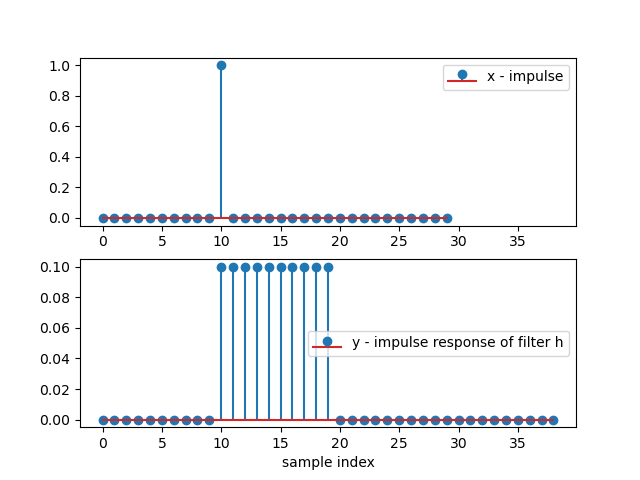

In [4]:
N = 10
h = np.ones((N,))/N  # moving average FIR filter

#Define "x" to be an "impulse", also known as kronecker delta function -
#  just a one at a single sample value
x = np.zeros((30,)) 
x[10] = 1

y = upfirdn(h, x)

figure()
subplot(2,1,1)
stem(x, label='x - impulse')
ax1 = gca()
legend()
subplot(2,1,2)
stem(y, label='y - impulse response of filter h')
xlim = getp(gca(), 'xlim')
setp(ax1, xlim=xlim)
legend()
xlabel('sample index')

In [5]:
# CONVINCE OURSELVES THAT UPFIRDN IS DOING CONVOLUTION

y_length = len(x) + len(h) - 1
y1 = np.zeros((y_length,))   # a new signal that should be the same as "y"

for n in range(y_length):
    for k in range(len(h)):
        if n-k < len(x)-1:  # avoid indexing beyond the end of "x"
            y1[n] += h[k]*x[n-k]

np.sum(abs(y-y1))  # if 0, these are the same!

0.0

C:\Users\hp\AppData\Local\Temp\ipykernel_19944\788926581.py:7: RuntimeWarning: divide by zero encountered in log10
  plot(f, 20*np.log10(np.abs(H)))


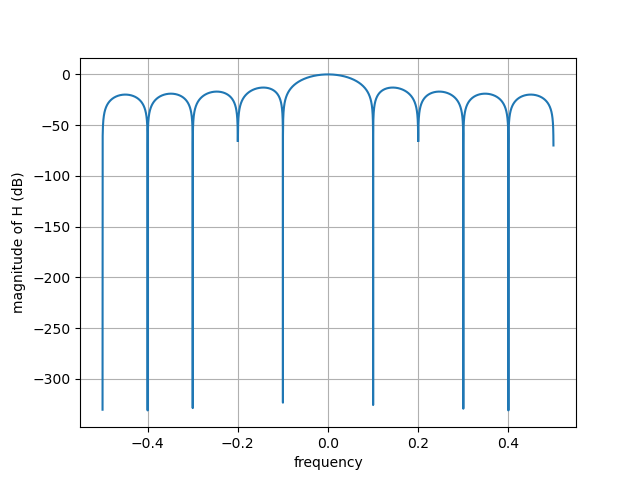

In [6]:
nfft = 10000

f = (np.arange(nfft)/nfft - 0.5)
H = np.fft.fftshift(np.fft.fft(h, nfft))

figure()
plot(f, 20*np.log10(np.abs(H)))
xlabel('frequency')
ylabel('magnitude of H (dB)')
grid()

C:\Users\hp\AppData\Local\Temp\ipykernel_19944\1746484759.py:5: RuntimeWarning: divide by zero encountered in log10
  plot(f, 20*np.log10(np.abs(H)))


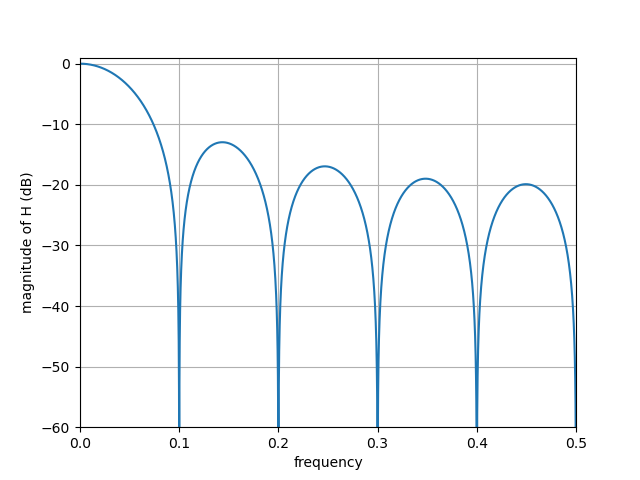

In [7]:
# Plot again but set ylimits to something reasonable, and xlimits to positive only 
# because the response is symmetric

figure()
plot(f, 20*np.log10(np.abs(H)))
xlabel('frequency')
ylabel('magnitude of H (dB)')
setp(gca(), xlim=(0, 0.5), ylim=(-60,1))
grid()